# MBA em Ciência de Dados
# Técnicas Avançadas de Captura e Tratamento de Dados

### <span style="color:darkred">Módulo II - Tratamento e limpeza de Dados</span>


### <span style="color:darkred">Avaliação</span>

Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

---

In [182]:
# carregando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.svm import SVC
from sklearn.linear_model import Ridge
from sklearn import metrics

# carregando dados
data = pd.read_csv("pib_mba_avaliacao2021.csv")

Vamos utilizar uma base de dados baseada em informações de população e PIB para cada município brasileiro, essa base foi adaptada da original do IBGE para o propósito dessa avaliação (e portanto parte das variáveis **estão modificadas e não são reais**). A base possui as seguintes colunas:
* gid - identificador geográfico do município
* UF - unidade federativa
* nome - nome do município
* Censo - ano do censo relativo aos dados
* PIB - total do PIB
* Pop_est_2009 - populacao estimada	
* PIB_percapita - PIB per capita segundo os dados
* Descrição - Descrição do dados
* classe - classe do município
* desemprego - índice de desemprego na cidade no ano do Censo


### Questão 1)

Verifique a distribuição dos valores e tipos dos atributos e realize um tratamento de dados considerando:

1. Correção dos dados que for possível inferir o valor verdadeiro, ajustando e padronizando-os. Anote em quais variáveis isso ocorreu. Valores outliers não devem ser removidos/alterados, apenas dados claramente errôneos ou não padronizados.
2. Conversão dos atributos que deveriam ser numéricos para numérico - inspecione os valores para garantir que a conversão não vá gerar dados faltantes de forma desnecessária, substituindo por numeros os que forem possíveis como por exemplo o atributo "floor" como visto na aula em que substituímos dados por 0. Anote as variáveis em que isso ocorreu.
    
Quais variáveis possuiam valores que precisaram ser padronizados ou corrigidos, e quantos valores em cada uma delas foi possível corrigir?
 
(a) UF (5) e Censo (2)<br>
(b) UF (9), Desemprego (10), Censo (3)<br>
(c) Censo (2) <br>
(d) UF (9) e Censo (2)<br>
---

resp: d

<AxesSubplot:>

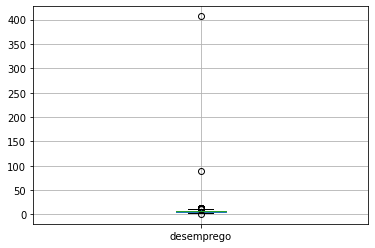

In [153]:
data[data['desemprego'].isnull()==False]['desemprego'].to_frame().boxplot()

In [154]:
data[data.isnull().any(axis=1)]

,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,classe,desemprego
24,3352,MINAS GERAIS,Diamantina,2010,2.876320e+05,46372,6202.709961,Produto Interno Bruto per capita,1,NaN
67,2351,PARAÍBA,Cabedelo,2010,2.332828e+06,51865,44978.851562,Produto Interno Bruto per capita,3,NaN
110,4511,BAHIA,Itaparica,2010,1.025866e+05,20796,4933.000000,Produto Interno Bruto per capita,1,NaN
140,4217,SÃO PAULO,Bastos,2010,3.223173e+05,21380,15075.650391,Produto Interno Bruto per capita,2,NaN
153,1671,RIO GRANDE DO NORTE,Pedra Preta,2010,1.263997e+04,2718,4650.470215,Produto Interno Bruto per capita,1,NaN
...,...,...,...,...,...,...,...,...,...,...
5314,456,RIO GRANDE DO SUL,Guaíba,2010,1.945150e+06,96603,20135.500000,Produto Interno Bruto per capita,2,NaN
5318,1083,GOIÁS,Alexânia,2010,3.043618e+05,20706,14699.209961,Produto Interno Bruto per capita,2,NaN
5428,4547,SÃO PAULO,Itapetininga,2010,2.164772e+06,148808,14547.419922,Produto Interno Bruto per capita,2,NaN
5447,2778,MINAS GERAIS,Alvinópolis,2010,1.309854e+05,15678,8354.730469,Produto Interno Bruto per capita,1,NaN


In [183]:
data.loc[data['Censo']=='“2010','Censo']='2010'
data.loc[data['Censo']=='20100','Censo']='2010'

In [184]:
data['Censo'].value_counts()

2010    5561
2007       5
Name: Censo, dtype: int64

In [185]:
data.loc[data['UF']=='MINAS G.','UF']='MINAS GERAIS'
data.loc[data['UF']=='PARANA ','UF']='PARANÁ'
data.loc[data['UF']=='SP','UF']='SÃO PAULO'
data.loc[data['UF']=='PIAU','UF']='PIAUÍ'
data.loc[data['UF']=='R.G. DO SUL','UF']='RIO GRANDE DO SUL'


In [186]:
data['UF'].value_counts().sort_values(ascending=False)

MINAS GERAIS           853
SÃO PAULO              648
RIO GRANDE DO SUL      496
BAHIA                  417
PARANÁ                 396
SANTA CATARINA         293
GOIÁS                  247
PIAUÍ                  224
PARAÍBA                223
MARANHÃO               217
PERNAMBUCO             186
CEARÁ                  184
RIO GRANDE DO NORTE    167
PARÁ                   145
MATO GROSSO            141
TOCANTINS              139
ALAGOAS                102
RIO DE JANEIRO          92
MATO GROSSO DO SUL      78
ESPIRITO SANTO          78
SERGIPE                 75
AMAZONAS                62
RONDÔNIA                52
ACRE                    22
AMAPÁ                   16
RORAIMA                 15
PARANA                   3
DISTRITO FEDERAL         1
Name: UF, dtype: int64

In [187]:
data[data['Censo'].isnull()]

,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,classe,desemprego
843,2192,BAHIA,Lamarão,NaN,30241.320312,12995,2327.149902,Produto Interno Bruto per capita,1,9.9
2347,3474,PERNAMBUCO,Pedra,NaN,121027.789062,20788,5822.000000,Produto Interno Bruto per capita,1,8.5
2683,5129,PERNAMBUCO,Buíque,NaN,251538.109375,53272,4721.770020,Produto Interno Bruto per capita,1,9.4
3361,1754,SÃO PAULO,São Pedro,NaN,348302.531250,31575,11030.959961,Produto Interno Bruto per capita,2,5.7
3384,5242,PERNAMBUCO,NaN,NaN,86340.601562,19026,4538.029785,Produto Interno Bruto per capita,1,9.1
3508,1767,SÃO PAULO,Salto de Pirapora,NaN,479193.375000,39616,12095.959961,Produto Interno Bruto per capita,2,7.0


### Questão 2)

Após o tratamento feito na Questão 2:
1. Remova colunas que possuam valores redundantes constantes
2. Exiba, e posteriormente remova municípios duplicados (considere nome e UF para esse fim), mantendo a primeira ocorrência. 

Qual o tamanho final da base de dados após esse tratamento?

(a) 5572 x 10<br>
(b) 5572 x 9<br>
(c) 5565 x 8<br>
(d) 5565 x 9<br>

---

resp d

In [188]:
data.drop('Descrição', axis=1, inplace=True)

In [189]:
data.columns[data.nunique()<=1]

Index([], dtype='object')

In [190]:
data.drop_duplicates(['nome','UF'],keep='first',inplace=True)

In [191]:
data.shape

(5565, 9)

---
### Questão 3)

Vamos analisar possíveis outliers. Utilize o método da análise da dispersão pelo *desvio padrão* e inspecione as colunas 'gid', 'PIB', 'Pop_est_2009', 'desemprego', procurando por outliers globais com critério de 3 desvios padrões, i.e. $3\sigma$. Nessa questão não remova outliers da base de dados, apenas identifique-os.

Quantos outliers foram encontrados, respectivamente, para 'gid', 'PIB', 'Pop_est_2009' e 'desemprego'?

(a) 0, 27, 1, 2<br>
(c) 0, 9, 44, 0<br>
(d) 1, 5, 9, 44<br>
(d) 0, 5, 27, 2<br>


In [192]:
data['gid']>3*std_gid

0       False
1       False
2       False
3       False
4       False
        ...  
5562     True
5563    False
5564    False
5565    False
5566    False
Name: gid, Length: 5565, dtype: bool

In [193]:
std=data['desemprego'].std()
mean=data['desemprego'].mean()
data[(data['desemprego']>(mean+(3*std)))|(data['desemprego']<(mean-(3*std)))].shape

(2, 9)

In [194]:
std=data['Pop_est_2009'].std()
mean=data['Pop_est_2009'].mean()
data[(data['Pop_est_2009']>(mean+(3*std)))|(data['Pop_est_2009']<(mean-(3*std)))].shape

(27, 9)

In [195]:
std=data['PIB'].std()
mean=data['PIB'].mean()
data[(data['PIB']>(mean+(3*std)))|(data['PIB']<(mean-(3*std)))].shape

(5, 9)

In [196]:
std_gid=data['gid'].std()
mean_gid=data['gid'].mean()
data[(data['gid']>(mean_gid+(3*std_gid)))|(data['gid']<(mean_gid-(3*std_gid)))]


,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,classe,desemprego


---

### Questão 4)

Utilize a base de dados após o tratamento inicial, e sem remoção de outliers. Imprima o total de valores faltantes em cada variável e, posteriormente, utilize o preenchimento por média condicionada, preenchendo 'desemprego' com as médias agrupadas por 'UF'.

Para isso codifique uma função que deverá:
1. calcular a média de uma variável alvo A (a ser preenchida) relativa a (ou agrupada por) cada valor distinto da variável que se deseja usar para agrupar;
2. atribuir a média calculada de forma agrupada a todas as linhas cuja variável alvo é faltante e que possua o valor da variável categórica correspondente;
3. o valor atribuido deve seguir o mesmo tipo da variável alvo, ou seja, int, float, etc. Quando int, realize o arredondamento utlizando `np.round(,0)`, quando float64 utilize `np.round(,1)`

Quantos dados faltantes existiam em "desemprego", e qual a média e o desvio padrão dessa variável após o preenchimento?

(a) 62 faltantes, média 6.6664, desvio padrão 5.8126<br>
(b) 59 faltantes, média 6.6663, desvio padrão 5.8126<br>
(c) 62 faltantes, média 5.8126, desvio padrão 5.8126<br>
(d) 62 faltantes, média 6.6663, desvio padrão 4.5120<br>


In [211]:
data['desemprego'].describe()

count    5565.000000
mean        6.666330
std         5.783436
min         1.000000
25%         5.200000
50%         6.400000
75%         7.900000
max       407.000000
Name: desemprego, dtype: float64

In [209]:
data['desemprego']=data.groupby('UF')['desemprego'].transform(lambda x: x.fillna(x.mean()))

In [210]:
data.isnull().sum()

gid              0
UF               0
nome             2
Censo            6
PIB              1
Pop_est_2009     0
PIB_percapita    4
classe           0
desemprego       0
dtype: int64

---

### Questão 5)

Desejamos projetar um algoritmo de aprendizado em que o atributo alvo é 'classe', inicialmente utilizando apenas dados da UF Paraná, mas posteriormente deveremos utilizar o modelo aprendido em toda a base de dados. 

Use os dados tratados após o preenchimento de dados faltantes de desemprego, porém sem remoção de outliers. Considere o atributo 'classe' e analise a distribuição dos seus valores em dois cenários:
1. base completa
2. considerando apenas a UF 'Paraná'. 

Após a análise podemos afirmar que:

(a) Os cenários 1 e 2 são desbalanceados, com classes minoritárias diferentes e majoritárias iguais.<br>
(b) Os cenários 1 e 2 são desbalanceados, com distribuição de classes similar.<br>
(c) Apenas o cenário 2 é desbalanceado. <br>
(d) Os cenários 1 e 2 são desbalanceados, com classes majoritárias diferentes.<br>

<function matplotlib.pyplot.show(close=None, block=None)>

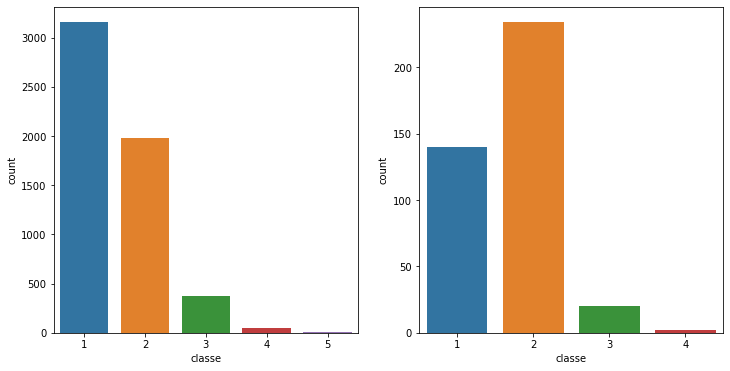

In [227]:
import seaborn as sns
plt.figure(figsize=(12,6))
plt.subplot(1,2,1); sns.countplot(data=data,x='classe')
plt.subplot(1,2,2); sns.countplot(data=data[data['UF']=='PARANÁ'],x='classe')
plt.show
